In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Subway ridership for 5 stations on 10 different days
ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])


In [4]:
station_with_max_riders_on_first_day = np.argmax(ridership, axis=1)[0]

station_with_max_riders_on_first_day

3

In [5]:
mean_riders_per_day_for_that_station = ridership[:,station_with_max_riders_on_first_day].mean()

mean_riders_per_day_for_that_station

3239.9

In [6]:
mean_ridership_overall = ridership.mean()

mean_ridership_overall

2342.6

In [7]:
# this returns the data of a particular column you want

ridership[:,1]

array([   0, 3877, 4088, 3392, 4802, 3933,  229,    0, 3785, 4043])

In [8]:
mean_ridership_per_day = ridership.mean(axis=0)

mean_ridership_per_day

array([1071.2, 2814.9, 2718.8, 3239.9, 1868.2])

In [9]:
max_ridership = mean_ridership_per_day.max()

max_ridership

3239.9

In [10]:
min_ridership = mean_ridership_per_day.min()
min_ridership

1071.2

In [11]:
ridership_df = pd.DataFrame(
    data=[[   0,    0,    2,    5,    0],
          [1478, 3877, 3674, 2328, 2539],
          [1613, 4088, 3991, 6461, 2691],
          [1560, 3392, 3826, 4787, 2613],
          [1608, 4802, 3932, 4477, 2705],
          [1576, 3933, 3909, 4979, 2685],
          [  95,  229,  255,  496,  201],
          [   2,    0,    1,   27,    0],
          [1438, 3785, 3589, 4174, 2215],
          [1342, 4043, 4009, 4665, 3033]],
    index=['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
           '05-06-11', '05-07-11', '05-08-11', '05-09-11', '05-10-11'],
    columns=['R003', 'R004', 'R005', 'R006', 'R007']
)

In [12]:
ridership_df

,R003,R004,R005,R006,R007
05-01-11,0,0,2,5,0
05-02-11,1478,3877,3674,2328,2539
05-03-11,1613,4088,3991,6461,2691
05-04-11,1560,3392,3826,4787,2613
05-05-11,1608,4802,3932,4477,2705
05-06-11,1576,3933,3909,4979,2685
05-07-11,95,229,255,496,201
05-08-11,2,0,1,27,0
05-09-11,1438,3785,3589,4174,2215
05-10-11,1342,4043,4009,4665,3033


In [13]:
max_station = ridership_df.iloc[0].idxmax()

max_station

'R006'

In [14]:
ridership_df[max_station].mean()

3239.9

In [15]:
ridership_df.values.mean()

2342.6

In [16]:
def mean_riders_for_max_station(ridership):
    
    max_station = ridership.iloc[0].idxmax()
    
    overall_mean =  ridership.values.mean()
    mean_for_max = ridership[max_station].mean()
    
    return (overall_mean, mean_for_max)

In [17]:
mean_riders_for_max_station(ridership_df)

(2342.6, 3239.9)

In [18]:
ridership = pd.DataFrame(
    {0: [5, 5, 5],
     1: [10, 10, 10],
     2: [15, 15, 15],
     3: [20, 20, 20],
     4: [25, 25, 25]},
    index=[0, 1, 2]
)

In [19]:
mean_riders_for_max_station(ridership)

(15.0, 25.0)

In [20]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

In [21]:
def helper(grade):
        
    if(90<=grade):
        return "A"
    elif(80<=grade<89):
        return "B"
    elif(70<=grade<79):
        return "C"
    elif(60<=grade<69):
        return "D"
    else:
        return "F"

In [22]:
def convert_grades(grades):
 
    
    return grades.applymap(helper)

In [23]:
convert_grades(grades_df)

,exam1,exam2
Andre,F,F
Barry,B,D
Chris,C,F
Dan,C,F
Emilio,F,D
Fred,C,F
Greta,A,F
Humbert,D,F
Ivan,A,C
James,B,D


In [24]:
grades = pd.DataFrame(
    {0: [90, 80, 70, 60, 50], 1: [89, 79, 69, 59, 49]},
    index=[0, 1, 2, 3, 4]
)

In [25]:
convert_grades(grades)

,0,1
0,A,F
1,B,F
2,C,F
3,D,F
4,F,F


In [26]:
def correlation(x,y):
    std_x = (x - x.mean()) / x.std(ddof=0)
    std_y = (y - y.mean()) / y.std(ddof=0)
    
    return (std_x * std_y).mean()

In [27]:
def standardize(x):
    return (x - x.mean()) / x.std()

In [28]:
grades_df.apply(standardize)

,exam1,exam2
Andre,-2.196525,-2.186335
Barry,0.208891,0.366571
Chris,0.018990,-0.091643
Dan,-0.170911,-0.091643
Emilio,0.715295,0.628408
Fred,-0.487413,-0.418938
Greta,0.841896,1.413917
Humbert,-0.803916,-0.746234
Ivan,1.284999,0.955703
James,0.588694,0.170194


In [29]:
def second_largest_in_column(column):
    sorted_series = column.sort_values(ascending=False)
    return sorted_series.iloc[1]

In [30]:
df = pd.DataFrame({
    'a': [4, 5, 3, 1, 2],
    'b': [20, 10, 40, 50, 30],
    'c': [25, 20, 5, 15, 10]
})


In [31]:
def second_largest(df):
    return df.apply(second_largest_in_column)



In [32]:
second_largest(df)

a     4
b    40
c    20
dtype: int64

In [33]:
term_one = ridership_df.sub(ridership_df.mean(axis='index'))

term_one

,R003,R004,R005,R006,R007
05-01-11,-1071.2,-2814.9,-2716.8,-3234.9,-1868.2
05-02-11,406.8,1062.1,955.2,-911.9,670.8
05-03-11,541.8,1273.1,1272.2,3221.1,822.8
05-04-11,488.8,577.1,1107.2,1547.1,744.8
05-05-11,536.8,1987.1,1213.2,1237.1,836.8
05-06-11,504.8,1118.1,1190.2,1739.1,816.8
05-07-11,-976.2,-2585.9,-2463.8,-2743.9,-1667.2
05-08-11,-1069.2,-2814.9,-2717.8,-3212.9,-1868.2
05-09-11,366.8,970.1,870.2,934.1,346.8
05-10-11,270.8,1228.1,1290.2,1425.1,1164.8


In [34]:
term_two = ridership_df.std(axis='index')

In [35]:
ridership_df.mean(axis='index')

R003    1071.2
R004    2814.9
R005    2718.8
R006    3239.9
R007    1868.2
dtype: float64

In [36]:
term_one.div(term_two)

,R003,R004,R005,R006,R007
05-01-11,-1.483517,-1.464186,-1.490418,-1.381108,-1.482822
05-02-11,0.563382,0.552457,0.524016,-0.389327,0.532425
05-03-11,0.750345,0.662210,0.697920,1.375216,0.653070
05-04-11,0.676945,0.300182,0.607403,0.660519,0.591160
05-05-11,0.743421,1.033601,0.665553,0.528167,0.664182
05-06-11,0.699103,0.581586,0.652936,0.742491,0.648308
05-07-11,-1.351951,-1.345070,-1.351624,-1.171481,-1.323285
05-08-11,-1.480748,-1.464186,-1.490967,-1.371716,-1.482822
05-09-11,0.507986,0.504603,0.477386,0.398805,0.275261
05-10-11,0.375034,0.638803,0.707795,0.608432,0.924521


In [37]:
def standardize2(df):
   
    term_one = df.sub(df.mean(axis='index'))
    term_two = df.std(ddof=0, axis='index')
    return term_one.div(term_two)

In [38]:
ridership_df.mean(axis='columns')

05-01-11       1.4
05-02-11    2779.2
05-03-11    3768.8
05-04-11    3235.6
05-05-11    3504.8
05-06-11    3416.4
05-07-11     255.2
05-08-11       6.0
05-09-11    3040.2
05-10-11    3418.4
dtype: float64

In [39]:
ridership_df.sub(ridership_df.mean(axis='columns'), axis='index')

,R003,R004,R005,R006,R007
05-01-11,-1.4,-1.4,0.6,3.6,-1.4
05-02-11,-1301.2,1097.8,894.8,-451.2,-240.2
05-03-11,-2155.8,319.2,222.2,2692.2,-1077.8
05-04-11,-1675.6,156.4,590.4,1551.4,-622.6
05-05-11,-1896.8,1297.2,427.2,972.2,-799.8
05-06-11,-1840.4,516.6,492.6,1562.6,-731.4
05-07-11,-160.2,-26.2,-0.2,240.8,-54.2
05-08-11,-4.0,-6.0,-5.0,21.0,-6.0
05-09-11,-1602.2,744.8,548.8,1133.8,-825.2
05-10-11,-2076.4,624.6,590.6,1246.6,-385.4


In [40]:
subway_df = pd.read_csv('Data/nyc_subway_weather.csv')

In [41]:
subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [42]:
subway_df.tail()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
42644,R464,05-31-11,04:00:00,567311,132804,0.0,0.0,2011-05-31 04:00:00,4,1,...,30.14,0,73.0,6.9,0.0,30.168333,75.366667,7.1,40.660004,-73.844849
42645,R464,05-31-11,08:00:00,290767,59788,0.0,0.0,2011-05-31 08:00:00,8,1,...,30.19,0,80.1,6.9,0.0,30.168333,75.366667,7.1,40.660004,-73.844849
42646,R464,05-31-11,12:00:00,419894,95280,0.0,0.0,2011-05-31 12:00:00,12,1,...,30.20,0,81.0,10.4,0.0,30.168333,75.366667,7.1,40.660004,-73.844849
42647,R464,05-31-11,16:00:00,419894,95280,0.0,0.0,2011-05-31 16:00:00,16,1,...,30.17,0,77.0,13.8,0.0,30.168333,75.366667,7.1,40.660004,-73.844849
42648,R464,05-31-11,20:00:00,419894,95280,0.0,0.0,2011-05-31 20:00:00,20,1,...,30.18,0,69.1,4.6,0.0,30.168333,75.366667,7.1,40.660004,-73.844849


In [48]:
temp_data = subway_df.groupby('DATEn').mean()['tempi']

In [50]:
temp_data

DATEn
05-01-11    56.961425
05-02-11    54.862248
05-03-11    60.649467
05-04-11    54.491782
05-05-11    55.489732
05-06-11    60.097451
05-07-11    61.452502
05-08-11    62.823799
05-09-11    62.041977
05-10-11    61.818875
05-11-11    59.626627
05-12-11    60.067708
05-13-11    57.850037
05-14-11    59.722569
05-15-11    61.655129
05-16-11    58.116961
05-17-11    55.614608
05-18-11    58.747456
05-19-11    64.271927
05-20-11    60.335944
05-21-11    63.494876
05-22-11    56.001320
05-23-11    59.899716
05-24-11    73.067495
05-25-11    72.897607
05-26-11    68.565944
05-27-11    72.161679
05-28-11    73.372533
05-29-11    73.879366
05-30-11    77.964932
05-31-11    77.714580
Name: tempi, dtype: float64

Populating the interactive namespace from numpy and matplotlib


<AxesSubplot:xlabel='DATEn'>

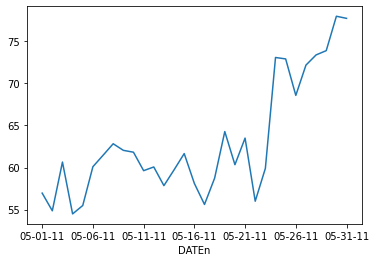

In [56]:
%pylab inline
temp_data.plot(x='tempi')

In [58]:
def get_hourly_entries_and_exits(entries_and_exits):
    
    return entries_and_exits.diff()
#   return entries_and_exits - entries_and_exits.shift(1)

In [63]:
subway_df.groupby('UNIT')[['ENTRIESn','EXITSn']].apply(get_hourly_entries_and_exits)

,ENTRIESn,EXITSn
0,NaN,NaN
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
42644,147417.0,37524.0
42645,-276544.0,-73016.0
42646,129127.0,35492.0
42647,0.0,0.0


In [71]:
subway_df = pd.DataFrame({
    'UNIT': ['R003', 'R003', 'R003', 'R003', 'R003', 'R004', 'R004', 'R004',
             'R004', 'R004'],
    'DATEn': ['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
              '05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'ENTRIESn': [ 4388333,  4388348,  4389885,  4391507,  4393043, 14656120,
                 14656174, 14660126, 14664247, 14668301],
    'EXITSn': [ 2911002,  2911036,  2912127,  2913223,  2914284, 14451774,
               14451851, 14454734, 14457780, 14460818],
    'latitude': [ 40.689945,  40.689945,  40.689945,  40.689945,  40.689945,
                  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ],
    'longitude': [-73.872564, -73.872564, -73.872564, -73.872564, -73.872564,
                  -73.867135, -73.867135, -73.867135, -73.867135, -73.867135]
})

weather_df = pd.DataFrame({
    'DATEn': ['05-01-11', '05-01-11', '05-02-11', '05-02-11', '05-03-11',
              '05-03-11', '05-04-11', '05-04-11', '05-05-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'latitude': [ 40.689945,  40.69132 ,  40.689945,  40.69132 ,  40.689945,
                  40.69132 ,  40.689945,  40.69132 ,  40.689945,  40.69132 ],
    'longitude': [-73.872564, -73.867135, -73.872564, -73.867135, -73.872564,
                  -73.867135, -73.872564, -73.867135, -73.872564, -73.867135],
    'pressurei': [ 30.24,  30.24,  30.32,  30.32,  30.14,  30.14,  29.98,  29.98,
                   30.01,  30.01],
    'fog': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'rain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'tempi': [ 52. ,  52. ,  48.9,  48.9,  54. ,  54. ,  57.2,  57.2,  48.9,  48.9],
    'wspdi': [  8.1,   8.1,   6.9,   6.9,   3.5,   3.5,  15. ,  15. ,  15. ,  15. ]
})


In [74]:
def combine_dfs(subway_df, weather_df):
    '''
    Fill in this function to take 2 DataFrames, one with subway data and one with weather data,
    and return a single dataframe with one row for each date, hour, and location. Only include
    times and locations that have both subway data and weather data available.
    '''
    return subway_df.merge(weather_df, on=['DATEn','hour', 'latitude', 'longitude'], how='inner')

In [75]:
combine_dfs(subway_df, weather_df)

,UNIT,DATEn,hour,ENTRIESn,EXITSn,latitude,longitude,pressurei,fog,rain,tempi,wspdi
0,R003,05-01-11,0,4388333,2911002,40.689945,-73.872564,30.24,0,0,52.0,8.1
1,R003,05-02-11,0,4388348,2911036,40.689945,-73.872564,30.32,0,0,48.9,6.9
2,R003,05-03-11,0,4389885,2912127,40.689945,-73.872564,30.14,0,0,54.0,3.5
3,R003,05-04-11,0,4391507,2913223,40.689945,-73.872564,29.98,0,0,57.2,15.0
4,R003,05-05-11,0,4393043,2914284,40.689945,-73.872564,30.01,0,0,48.9,15.0
5,R004,05-01-11,0,14656120,14451774,40.691320,-73.867135,30.24,0,0,52.0,8.1
6,R004,05-02-11,0,14656174,14451851,40.691320,-73.867135,30.32,0,0,48.9,6.9
7,R004,05-03-11,0,14660126,14454734,40.691320,-73.867135,30.14,0,0,54.0,3.5
8,R004,05-04-11,0,14664247,14457780,40.691320,-73.867135,29.98,0,0,57.2,15.0
9,R004,05-05-11,0,14668301,14460818,40.691320,-73.867135,30.01,0,0,48.9,15.0


In [76]:
subway_df = pd.read_csv('Data/nyc_subway_weather.csv')

In [79]:
subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


<AxesSubplot:xlabel='day_week'>

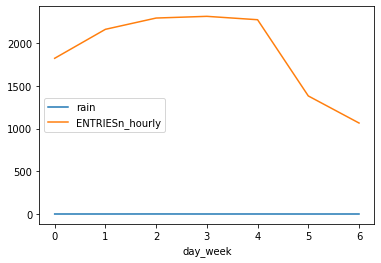

In [105]:
subway_df.groupby('day_week').mean()[['rain','ENTRIESn_hourly']].plot()

In [109]:
everyday_rain = subway_df.groupby('rain').mean()['ENTRIESn_hourly']
everyday_rain

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,precipi,pressurei,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
rain,,,,,,,,,,,,,,,,,,,,
0,2.815835e+07,1.990641e+07,1845.539439,1333.111451,10.049359,2.998064,0.682616,40.724497,-73.940368,0.002147,0.000008,29.997082,64.304694,6.561112,0.000008,29.997082,64.304694,6.561112,40.728433,-73.938697
1,2.800933e+07,1.974410e+07,2028.196035,1459.373918,10.037767,2.587167,0.824204,40.725167,-73.940349,0.036307,0.020520,29.881459,58.961158,8.193031,0.020520,29.881459,58.961158,8.193031,40.728978,-73.938680


<AxesSubplot:xlabel='rain'>

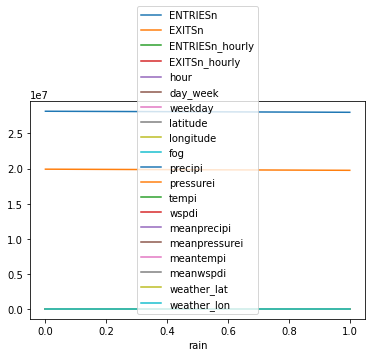

In [110]:
everyday_rain.plot()

<AxesSubplot:xlabel='DATEn'>

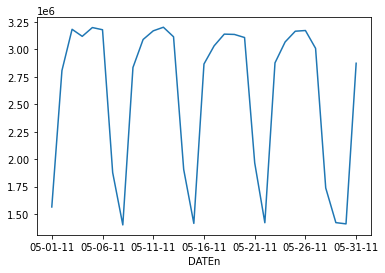

In [106]:
subway_df.groupby('DATEn').sum()['ENTRIESn_hourly'].plot()

In [135]:
hehe = subway_df.groupby('DATEn', as_index=False).mean()

In [136]:
hehe.head()

,DATEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,05-01-11,2.833580e+07,2.009235e+07,1148.929464,884.451139,10.092579,6.0,0.0,40.724937,-73.940812,...,30.264320,0.000000,56.961425,5.814916,0.000000,30.264320,56.961425,5.814916,40.728851,-73.939202
1,05-02-11,2.843156e+07,2.009694e+07,2022.293948,1446.172190,9.956772,0.0,1.0,40.724718,-73.941222,...,30.237277,0.000000,54.862248,6.709798,0.000000,30.237277,54.862248,6.709798,40.728618,-73.939374
2,05-03-11,2.830208e+07,1.995427e+07,2262.351102,1591.868515,9.975835,1.0,1.0,40.725368,-73.940668,...,30.062552,0.000000,60.649467,7.069439,0.000000,30.062552,60.649467,7.069439,40.729227,-73.938904
3,05-04-11,2.752266e+07,1.957151e+07,2268.301818,1628.776727,10.048000,2.0,1.0,40.724270,-73.939829,...,29.961673,0.994182,54.491782,7.423273,0.013287,29.961673,54.491782,7.423273,40.728365,-73.938306
4,05-05-11,2.788363e+07,1.964187e+07,2313.088937,1626.900940,10.047722,3.0,1.0,40.724690,-73.940529,...,29.954924,0.000000,55.489732,10.469704,0.000000,29.954924,55.489732,10.469704,40.728606,-73.938817


<AxesSubplot:xlabel='DATEn', ylabel='rain'>

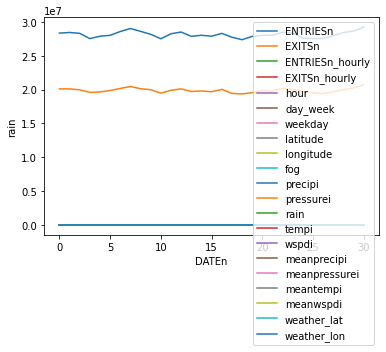

In [137]:
hehe.plot(xlabel='DATEn', ylabel='rain')